In [40]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import sys
import os

import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb, hex2color
from sklearn.preprocessing import OrdinalEncoder
from scipy.cluster.hierarchy import cut_tree, dendrogram, leaves_list

import numpy as np
from numpy_groupies.aggregate_numpy import aggregate
import cytograph as cg
import cytograph.visualization as cgplot

import loompy

In [2]:
superclass = np.array(["Rhombic lip excitatory",
"Rhombic lip excitatory",
"Rhombic lip excitatory",
"Rhombic lip excitatory",
"Rhombic lip excitatory",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Thalamic excitatory",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Forebrain excitatory",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"MSN",
"Eccentric MSN",
"Forebrain excitatory",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Forebrain excitatory",
"Miscellaneous rare",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"Miscellaneous rare",
"Miscellaneous rare",
"Hipp. CA1-CA3",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare",
"Hipp. CA1-CA3",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"Hipp. DG",
"Hipp. DG",
"Hipp. DG",
"Hipp. DG",
"Hipp. DG",
"Hipp. DG",
"Hipp. DG",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Miscellaneous rare",
"Forebrain excitatory",
"Forebrain excitatory",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Hipp. CA1-CA3",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Miscellaneous rare",
"Hipp. CA1-CA3",
"Forebrain excitatory",
"Forebrain excitatory",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Bergmann glia",
"OPC",
"OPC",
"OPC",
"OPC",
"OPC",
"Oligodendrocyte",
"Oligodendrocyte",
"Rhombic lip excitatory",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Oligodendrocyte",
"Choroid plexus",
"Choroid plexus",
"Choroid plexus",
"Choroid plexus",
"Choroid plexus",
"Choroid plexus",
"Choroid plexus",
"VLMC",
"VLMC",
"VLMC",
"VLMC",
"VLMC",
"VLMC",
"VLMC",
"VLMC",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Immune",
"Immune",
"Immune",
"Immune",
"Immune",
"Immune",
"Immune",
"Immune",
"Immune",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare"])

In [3]:
d = "/proj/human_adult/20220222/harmony/new_embeddings/data/"
with loompy.connect(d + "harmony_A.loom", "r") as ds:
    labels = ds.ca.Clusters[:]
    paris21 = ds.ca.Paris21[:]

with open(d + "TSNE30.npy", "rb") as f:
    tsne30 = np.load(f)

In [ ]:
from openTSNE import TSNE
d = "/proj/human_adult/20220222/harmony/new_embeddings/data/"
with loompy.connect(d + "harmony_A.loom", "r") as ds:
    pca = ds.ca.PCA
tsne28 = TSNE(perplexity=20, exaggeration=2.8).fit(pca)

In [33]:
with open(d + "TSNE28.npy", "rb") as f:
    tsne28 = np.load(f)

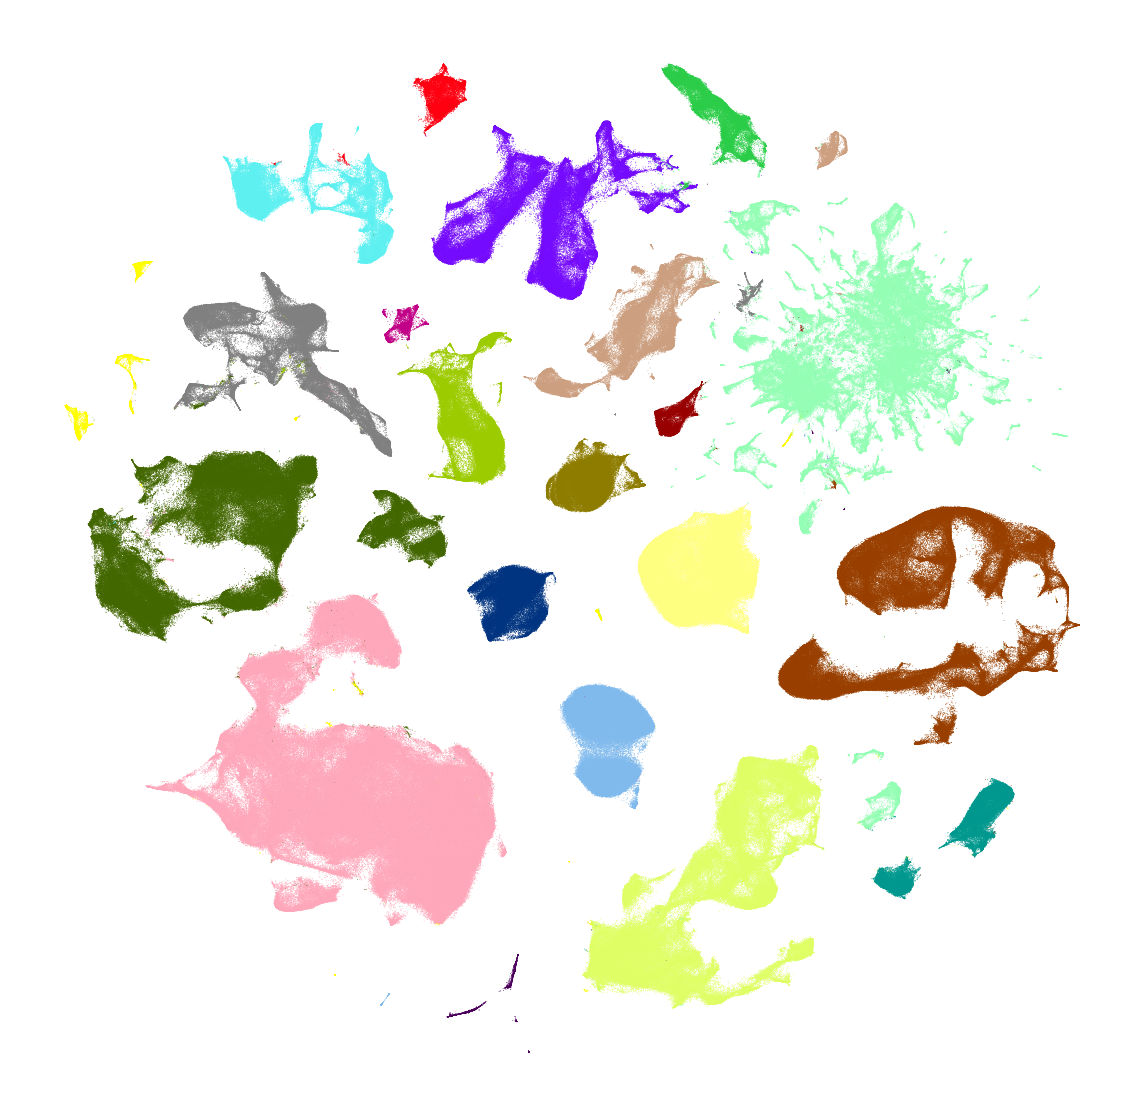

In [31]:
plt.figure(figsize=(10, 10))
cgplot.scatterc(tsne28, c=superclass[labels], colors="superclasses", legend=None)
plt.axis("off")
None


In [4]:
d = "/proj/human_adult/20220222/harmony/new_embeddings/data/"
with loompy.connect(d + "harmony_B.loom", "r") as ds:
    gtsne = ds.ca.TSNE[:]
    gumap = ds.ca.UMAP[:]
    glabels = ds.ca.Clusters[:]
    paris10 = ds.ca.Paris10[:]
    pca = ds.ca.PCA[:]


In [5]:
from openTSNE import TSNE
xy = TSNE(perplexity=20, exaggeration=1.5).fit(pca)

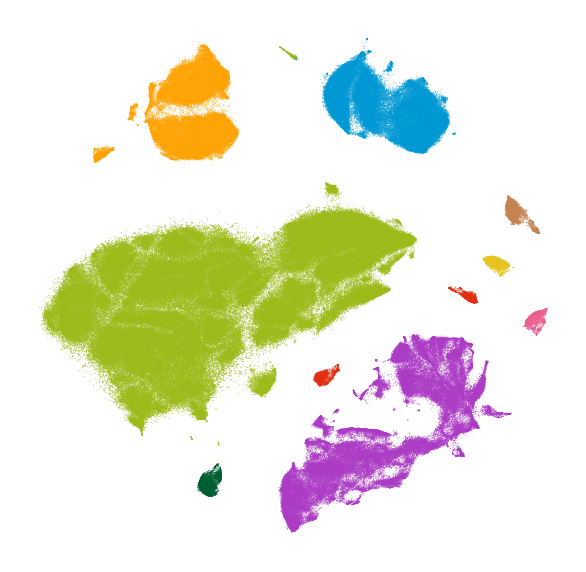

In [26]:
plt.figure(figsize=(5, 5))
cgplot.scatterc(xy, c=superclass[glabels], colors=colorizer, legend=None)
plt.axis("off")
None

### The cell below contains definitions

In [37]:
fpool = "/proj/human_adult/20220222/harmony/paris_top_bug/data/Pool.loom"
fagg =  "/proj/human_adult/20220222/harmony/paris_top_bug/data/Pool.agg.loom"

euclidean_ordering = np.array([460,
459,
458,
457,
448,
455,
449,
450,
454,
452,
451,
453,
456,
447,
446,
445,
444,
443,
442,
440,
441,
439,
438,
437,
432,
433,
434,
435,
436,
431,
429,
430,
407,
406,
405,
404,
403,
408,
409,
388,
383,
382,
380,
381,
379,
386,
385,
384,
387,
378,
377,
402,
401,
400,
399,
398,
397,
396,
395,
391,
392,
394,
393,
390,
389,
411,
420,
419,
418,
417,
415,
416,
414,
413,
412,
421,
422,
427,
425,
426,
424,
423,
428,
250,
263,
262,
258,
259,
260,
261,
252,
251,
255,
254,
253,
256,
257,
264,
268,
267,
275,
271,
272,
266,
265,
270,
269,
279,
278,
277,
276,
274,
273,
280,
281,
282,
284,
283,
285,
286,
308,
309,
304,
305,
306,
307,
313,
314,
293,
310,
311,
312,
290,
291,
292,
303,
300,
301,
302,
299,
298,
297,
294,
295,
296,
315,
316,
317,
318,
319,
322,
321,
320,
367,
368,
369,
360,
361,
362,
365,
366,
363,
364,
359,
353,
354,
355,
375,
374,
371,
370,
356,
357,
358,
372,
373,
289,
288,
287,
330,
331,
332,
333,
335,
334,
336,
337,
338,
339,
340,
342,
341,
348,
347,
346,
345,
344,
343,
349,
323,
324,
328,
325,
329,
326,
327,
249,
246,
245,
248,
247,
243,
244,
240,
241,
242,
239,
238,
236,
235,
237,
231,
232,
233,
234,
222,
221,
220,
228,
229,
223,
224,
225,
226,
227,
216,
194,
186,
185,
206,
191,
202,
203,
201,
215,
214,
213,
212,
207,
204,
205,
209,
208,
210,
211,
190,
189,
188,
187,
193,
192,
196,
195,
197,
198,
199,
200,
170,
172,
171,
173,
175,
176,
174,
177,
178,
184,
183,
182,
167,
168,
169,
166,
165,
164,
163,
181,
180,
179,
155,
156,
157,
158,
162,
161,
160,
159,
410,
140,
139,
138,
141,
142,
133,
134,
136,
135,
137,
4,
3,
2,
1,
0,
5,
132,
15,
14,
12,
13,
10,
11,
9,
8,
51,
49,
50,
46,
48,
47,
44,
45,
43,
42,
41,
6,
21,
16,
19,
18,
25,
74,
20,
17,
40,
39,
38,
110,
109,
108,
106,
107,
33,
37,
36,
30,
29,
59,
31,
28,
35,
34,
27,
32,
52,
62,
70,
71,
67,
72,
66,
65,
23,
63,
64,
68,
7,
73,
97,
98,
53,
60,
54,
61,
77,
76,
78,
81,
75,
55,
58,
57,
96,
26,
24,
69,
80,
56,
79,
105,
104,
22,
376,
218,
230,
350,
352,
351,
103,
131,
217,
113,
112,
92,
94,
95,
86,
93,
91,
82,
84,
83,
85,
87,
89,
88,
90,
102,
101,
99,
100,
219,
111,
114,
143,
149,
148,
150,
146,
147,
144,
145,
154,
153,
152,
151,
130,
129,
128,
121,
122,
123,
124,
127,
125,
126,
116,
120,
119,
118,
117,
115])

superclass = np.array(["Rhombic lip excitatory",
"Rhombic lip excitatory",
"Rhombic lip excitatory",
"Rhombic lip excitatory",
"Rhombic lip excitatory",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Hindbrain-derived excitatory",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Mammillary body",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Thalamic excitatory",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Forebrain excitatory",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"MSN",
"Eccentric MSN",
"Forebrain excitatory",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Thalamic excitatory",
"Forebrain excitatory",
"Miscellaneous rare",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Cerebellar VZ inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"Midbrain-derived inhibitory",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"CGE interneurons",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"LAMP5-LHX6 and Chandelier",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"MGE interneurons",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"Glycinergic, cholinergic, monoaminergic, or peptidergic",
"MSN",
"Eccentric MSN",
"Eccentric MSN",
"Eccentric MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"MSN",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L5/6 NP",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"L6 CT/b",
"Miscellaneous rare",
"Miscellaneous rare",
"Hipp. CA1-CA3",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare",
"Hipp. CA1-CA3",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L2/3 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"L5-6 IT",
"Hipp. DG",
"Hipp. DG",
"Hipp. DG",
"Hipp. DG",
"Hipp. DG",
"Hipp. DG",
"Hipp. DG",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA1-CA3",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Hipp. CA4",
"Miscellaneous rare",
"Forebrain excitatory",
"Forebrain excitatory",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Hipp. CA1-CA3",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Forebrain excitatory",
"Miscellaneous rare",
"Hipp. CA1-CA3",
"Forebrain excitatory",
"Forebrain excitatory",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Oligodendrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Astrocyte",
"Bergmann glia",
"OPC",
"OPC",
"OPC",
"OPC",
"OPC",
"Oligodendrocyte",
"Oligodendrocyte",
"Rhombic lip excitatory",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Ependymal-like",
"Oligodendrocyte",
"Choroid plexus",
"Choroid plexus",
"Choroid plexus",
"Choroid plexus",
"Choroid plexus",
"Choroid plexus",
"Choroid plexus",
"VLMC",
"VLMC",
"VLMC",
"VLMC",
"VLMC",
"VLMC",
"VLMC",
"VLMC",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Vascular",
"Immune",
"Immune",
"Immune",
"Immune",
"Immune",
"Immune",
"Immune",
"Immune",
"Immune",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare",
"Miscellaneous rare",])

In [38]:
# Helper functions
def sparkline(ax, x, ymax, color, plot_label):
    n_clusters = x.shape[0]
    if ymax is None:
        ymax = np.max(x)
    ax.bar(np.arange(n_clusters) + 0.5, x, color=color, width=1, lw=0)
    ax.set_xlim(0, n_clusters + 1)
    ax.set_ylim(0, ymax)
    ax.axis("off")
    ax.text(0, 0, plot_label, va="bottom", ha="right", transform=ax.transAxes)



def plot_genes(ax, mgenes, mean_x, genes):
    # Add the markers
    m = []
    m_names = []
    for gene in mgenes:
        gene_ix = np.where(genes == gene)[0][0]
        m.append(mean_x[:, gene_ix])
        m_names.append(f"{gene}")
    n_genes = len(m_names)
    n_clusters = labels.max() + 1

    # Normalize
    x = np.array(m)
    x_norm = cg.div0(x.T, np.percentile(x, 99.9, axis=1)).T
    bg = np.zeros_like(x_norm) + 0.9
    x_norm = np.ma.masked_where(x == 0, x_norm)


    ax.imshow(bg, vmin=0, vmax=1, cmap=plt.cm.gray, aspect="auto", extent=(0, n_clusters, n_genes, 0), alpha=1, interpolation="nearest", resample=False)
    ax.imshow(x_norm, cmap="inferno_r", vmax=1, interpolation="nearest", aspect="auto", alpha=1, extent=(0, n_clusters, n_genes, 0), resample=False)

    #ax.imshow(np.log10(x_norm + 0.001), vmin=-1, vmax=2, cmap="RdGy_r", interpolation="none", aspect="auto", extent=(0, n_clusters, n_genes, 0))
    ax.set_yticks(np.arange(len(m_names)) + 0.5)
    ax.set_yticklabels(m_names, fontsize=9)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)



In [41]:
# Prepare all the data we'll need
with loompy.connect(fagg, "r") as ds:
    genes = ds.ra.Gene
    mean_x = ds[:, :].T

    linkage = ds.attrs.euclidean_linkage
    n_clusters = ds.shape[1]
    linkage_ordering = np.argsort(leaves_list(linkage))
    n_cells_per_cluster = ds.ca.NCells

with loompy.connect(fpool, "r") as ds:
    labels = ds.ca.Clusters
    rg = ds.ca.ROIGroupFine
    for key, val in {  # Set up the ROI groups corresponding to Fig. 1A
        'Claustrum': 'Cerebral cortex',
        'Basal nuclei': 'Basal forebrain', 
        'Amygdaloid complex': 'Amygdala',
        'Extended amygdala': 'Amygdala',
        "Myelencephalon": "Medulla"
    }.items():
        rg[rg == key] = val

# Compute ROI distribution on coarse ROI groups
rois = np.array(cgplot.Colorizer("roigroupmid").scheme.names)
n_rois = rois.shape[0]
roidistro = np.zeros((n_rois, n_clusters))
le = OrdinalEncoder(categories=[rois])
le.fit(rg.reshape(-1, 1))
for label in np.arange(n_clusters):
    subset = le.transform(rg[labels == label].reshape(-1, 1)).flatten().astype("int32")
    d = aggregate(subset, subset, func="count", size=n_rois)
    roidistro[:, label] = d

# Compute the contributions of each donor to each cluster
donors = ['H18.30.001', 'H18.30.002', 'H19.30.001', 'H19.30.002']
donordist = np.zeros((n_clusters, 4), dtype="float32")
with loompy.connect(fpool, "r") as ds:
    for ix, donor in enumerate(donors):
        donordist[:, ix] = aggregate(ds.ca.Clusters, ds.ca.Donor == donor, size=n_clusters)
donordist = (donordist.T / donordist.sum(axis=1)).T

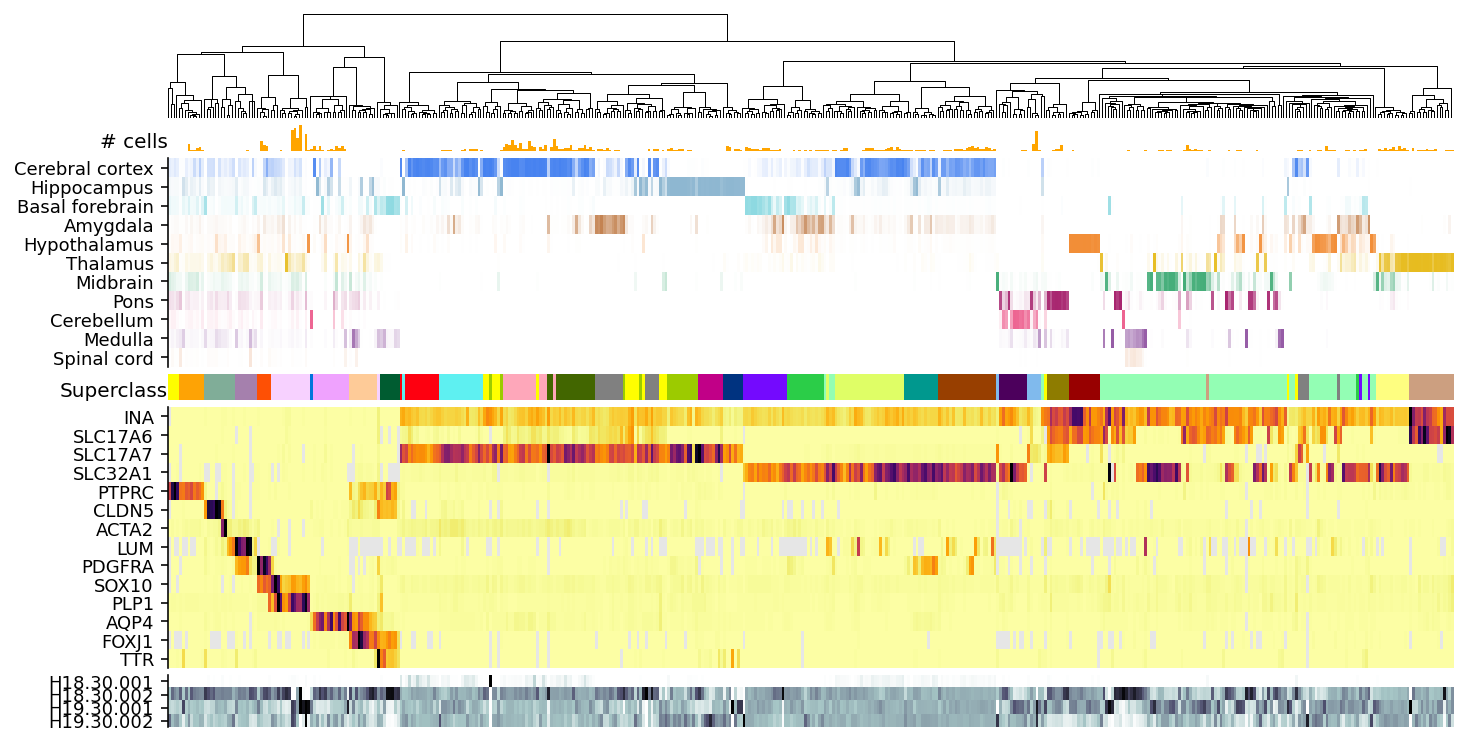

In [43]:
# Set up the figure
fig, axes = plt.subplots(nrows=6, ncols=1, sharex=True, gridspec_kw={"height_ratios": (1, 0.25, 2, 0.25, 2.5, 0.5)}, figsize=(10, 5))

# Dendrogram
ax = axes[0]
lc = cgplot.dendrogram(linkage, leaf_positions=linkage_ordering)
lc.set_linewidth(0.5)
lc.set_color("black")
ax.add_collection(lc)
ax.set_xlim(0, n_clusters)
ax.set_ylim(0, linkage[:, 2].max())
ax.axis("off")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Number of cells
sparkline(axes[1], n_cells_per_cluster[euclidean_ordering], None, "orange", "# cells")

# ROI groups
ax = axes[2]

opacity = roidistro / roidistro.sum(axis=0)
color = np.zeros((n_rois, n_clusters, 4))
color[:, :, 3] = opacity
scheme = cgplot.Colorizer("roigroupmid").scheme
for ix in range(n_clusters):
    color[:, ix, :3] = np.array(np.vectorize(to_rgb)(scheme.colors)).T
ax.imshow(color[:, euclidean_ordering, :], aspect='auto', interpolation="nearest", origin="upper", extent=(0, n_clusters, n_rois, 0))
ax.set_yticks(np.arange(n_rois) + 0.5)
ax.set_yticklabels(scheme.names, fontsize=9)
ax.set_xticks([])
ax.set_ylim(n_rois, 0)
ax.set_xlim(0, n_clusters)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Superclasses
ax = axes[3]
colors = np.array(np.vectorize(to_rgb)(cgplot.Colorizer("superclasses").fit_transform(superclass))).T
ax.imshow(colors[None, euclidean_ordering],aspect="auto", extent=(0, n_clusters, 1, 0), interpolation="nearest")
ax.axis("off")
ax.text(0, 0, "Superclass", va="bottom", ha="right", transform=ax.transAxes)

# Genes
plot_genes(axes[4], ["INA", "SLC17A6", "SLC17A7", "SLC32A1", "PTPRC", "CLDN5", "ACTA2", "LUM", "PDGFRA", "SOX10", "PLP1", "AQP4", "FOXJ1", "TTR" ], mean_x[euclidean_ordering, :], genes)

# Donors
ax = axes[5]
ax.imshow(donordist[euclidean_ordering, :].T, vmin=0, vmax=1, cmap=plt.cm.bone_r, aspect='auto', interpolation="nearest", origin="upper", extent=(0, n_clusters, 4, 0))
ax.set_yticks(np.arange(4) + 0.5)
ax.set_yticklabels(donors, fontsize=9)
ax.set_xticks([])
ax.set_ylim(4, 0)
ax.set_xlim(0, n_clusters)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

fig.tight_layout(pad=0, h_pad=0, w_pad=0)

plt.savefig("Humandev_Fig1_heatmap.pdf", dpi=300)

In [51]:
# Make a dictionary to map cell IDs to top-level clusters
cells_dict = {}
fagg = '/proj/human_adult/20220222/harmony/paris_top_bug/data/Pool.agg.loom'
fpool = '/proj/human_adult/20220222/harmony/paris_top_bug/data/Pool.loom'
with loompy.connect(fpool, "r") as ds:
    cellids = ds.ca.CellID
    clusters = ds.ca.Clusters
for i, c in zip(cellids, clusters):
    cells_dict[i] = c    

In [57]:
# Plot number of fine clusters per coarse cluster
with loompy.connect("/proj/human_adult/20220222/harmony/by_cluster/data/Pool.loom", "r") as ds:
    coarse_clusters = np.array([cells_dict[c] for c in ds.ca.CellID])
    fine_clusters = ds.ca.Clusters
    n_fine_per_coarse = []
    for c in np.unique(coarse_clusters):
        n_fine_per_coarse.append(len(np.unique(fine_clusters[coarse_clusters == c])))
n_fine_per_coarse = np.array(n_fine_per_coarse)

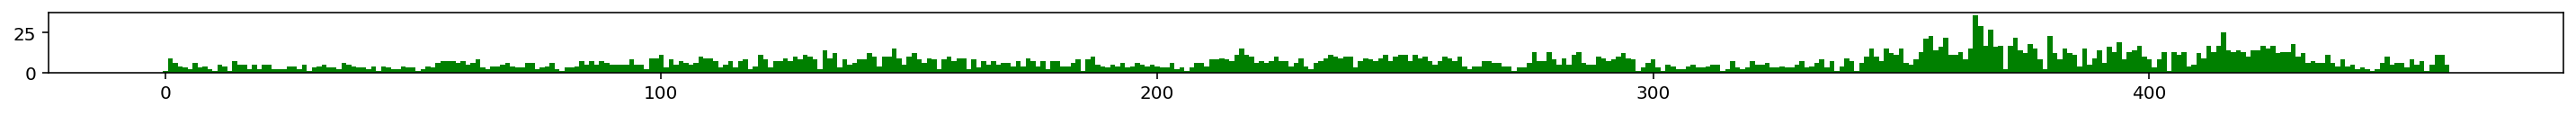

In [70]:
plt.figure(figsize=(20, 1))
plt.bar(np.arange(461), n_fine_per_coarse[euclidean_ordering], width=1, color="#008000")
#plt.axis("off")
plt.tight_layout()